In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import tensorflow as tf
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from sklearn.metrics import classification_report

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import re
from dateutil import parser

from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import pandas as pd
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cleaned_data.csv')
df

,stars,cleaned_text,sentiment
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive
...,...,...,...
8892,5,"['food', 'good', 'delivery', 'took', 'forever'...",positive
8893,1,"['whenever', 'never', 'sent', 'correct', 'item...",negative
8894,1,"['delivery', 'driver', 'turn', 'incorrect', 'l...",negative
8895,5,"['great', 'deal', 'buddy', 'pizza', 'buy', 'on...",positive


## Data Cleaning

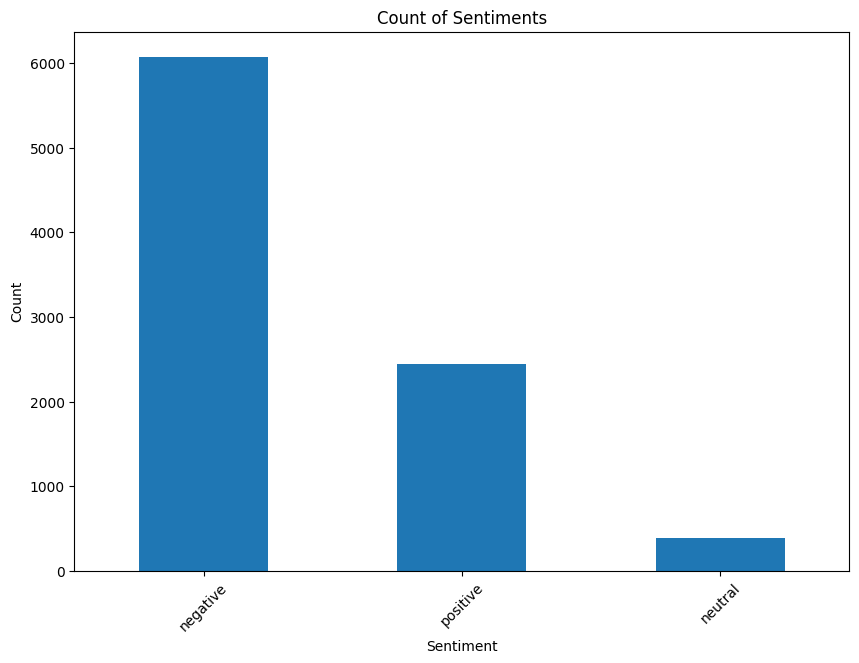

In [4]:
# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot bar chart
sentiment_counts.plot(kind='bar', figsize=(10,7))

plt.title('Count of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [5]:
import ast
#  convert string representations of lists in 'cleaned_text' back to actual lists
df['cleaned_text_list'] = df['cleaned_text'].apply(ast.literal_eval)

# convert lists in 'cleaned_text_list' to strings
df['cleaned_text_str'] = df['cleaned_text_list'].apply(' '.join)

In [6]:
# initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [7]:
# convert 'cleaned_text_str' into TF-IDF vectors
X = vectorizer.fit_transform(df['cleaned_text_str'])

# use 'sentiment' as target
y = df['sentiment']

In [8]:
# Define oversampling strategy
over = RandomOverSampler(sampling_strategy='auto')

# Fit and apply the transform
X_over, y_over = over.fit_resample(X, y)

# Define undersampling strategy
under = RandomUnderSampler(sampling_strategy='auto')

# Fit and apply the transform
X_under, y_under = under.fit_resample(X, y)

# Modelling

In [9]:
# split the oversampled data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [10]:
# split the undersampled data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

## Logistic Regression

In [11]:
# initialize and train the Logistic Regression model on the oversampled data
lr_model_over = LogisticRegression()
lr_model_over.fit(X_train_over, y_train_over)

# make predictions on the test set
y_pred_over = lr_model_over.predict(X_test_over)

# print classification report for the oversampled data
print("Logistic Regression Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

Logistic Regression Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.96      0.90      0.93      1209
     neutral       0.92      1.00      0.96      1238
    positive       0.96      0.93      0.94      1194

    accuracy                           0.94      3641
   macro avg       0.94      0.94      0.94      3641
weighted avg       0.94      0.94      0.94      3641


Accuracy:  0.9425981873111783

Precision:  0.9437477189596212

Recall:  0.9425981873111783

F1 Score:  0.9422947830807293


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# initialize and train the Logistic Regression model on the undersampled data
lr_model_under = LogisticRegression()
lr_model_under.fit(X_train_under, y_train_under)

# make predictions on the test set
y_pred_under = lr_model_under.predict(X_test_under)

# print classification report for the undersampled data
print("\nLogistic Regression Metrics for Undersampled Data:")
print(classification_report(y_test_under, y_pred_under))


Logistic Regression Metrics for Undersampled Data:
              precision    recall  f1-score   support

    negative       0.77      0.77      0.77        84
     neutral       0.58      0.61      0.59        77
    positive       0.78      0.74      0.76        73

    accuracy                           0.71       234
   macro avg       0.71      0.71      0.71       234
weighted avg       0.71      0.71      0.71       234



In [13]:
# make predictions on the test set for undersampled data
y_pred_under = lr_model_under.predict(X_test_under)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_under, y_pred_under))

# print precision
print("\nPrecision: ", precision_score(y_test_under, y_pred_under, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_under, y_pred_under, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_under, y_pred_under, average='weighted'))


Accuracy:  0.7094017094017094

Precision:  0.7128608851636227

Recall:  0.7094017094017094

F1 Score:  0.7108173219779568


Here are some reasons why the above has happend

Loss of Information: When you undersample, you're essentially discarding potentially useful information. The randomly removed instances from the majority class could contain important information that the model needs to correctly classify new instances.

Overfitting: If the minority class is very small compared to the majority class, undersampling can lead to overfitting. The model trained on the undersampled dataset might not generalize well to new, unseen data.

Representation: The undersampled dataset may not adequately represent the majority class, especially if the class is not homogeneous. This can lead to a model that performs poorly on the majority class.

In [14]:
from sklearn.naive_bayes import GaussianNB

# initialize and train the Gaussian Naive Bayes model on the oversampled data
nb_model_over = GaussianNB()
nb_model_over.fit(X_train_over.toarray(), y_train_over)

GaussianNB()

In [15]:
# make predictions on the test set
y_pred_over = nb_model_over.predict(X_test_over.toarray())

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))


Accuracy:  0.7824773413897281

Precision:  0.8133842672554329

Recall:  0.7824773413897281

F1 Score:  0.7780557521896062


In [16]:
from sklearn.naive_bayes import MultinomialNB

# initialize and train the Multinomial Naive Bayes model on the oversampled data
mnb_model_over = MultinomialNB()
mnb_model_over.fit(X_train_over, y_train_over)

MultinomialNB()

In [17]:
# make predictions on the test set
y_pred_over = mnb_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))


Accuracy:  0.8931612194452073

Precision:  0.8985080916693502

Recall:  0.8931612194452073

F1 Score:  0.8935573161020508


In [18]:
from sklearn.naive_bayes import BernoulliNB

# initialize and train the Bernoulli Naive Bayes model on the oversampled data
bnb_model_over = BernoulliNB()
bnb_model_over.fit(X_train_over, y_train_over)

BernoulliNB()

In [19]:
# make predictions on the test set
y_pred_over = bnb_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))


Accuracy:  0.8393298544355946

Precision:  0.8478354545872561

Recall:  0.8393298544355946

F1 Score:  0.839186472062078


In [20]:
from sklearn.svm import SVC

# initialize and train the SVM model on the oversampled data
svm_model_over = SVC(probability=True)
svm_model_over.fit(X_train_over, y_train_over)

SVC(probability=True)

In [21]:
# make predictions on the test set
y_pred_over = svm_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))


Accuracy:  0.9865421587475968

Precision:  0.9865605486421272

Recall:  0.9865421587475968

F1 Score:  0.9865422846008154


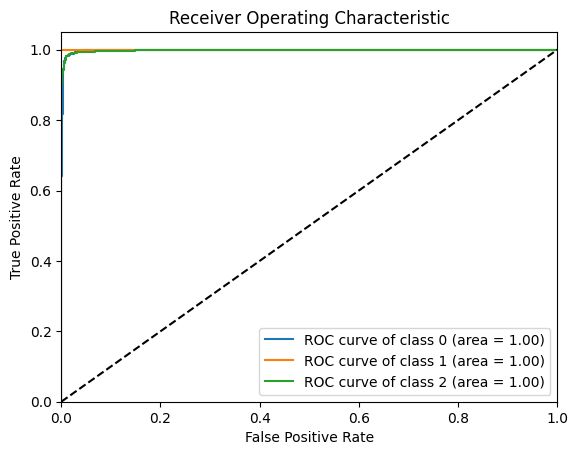

In [22]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_over_bin = label_binarize(y_test_over, classes=np.unique(y_train_over))

# calculate the probabilities on the test set
y_prob_over = svm_model_over.predict_proba(X_test_over)

# calculate the number of unique classes
n_classes = len(np.unique(y_train_over))

# calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_over_bin[:, i], y_prob_over[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot the ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

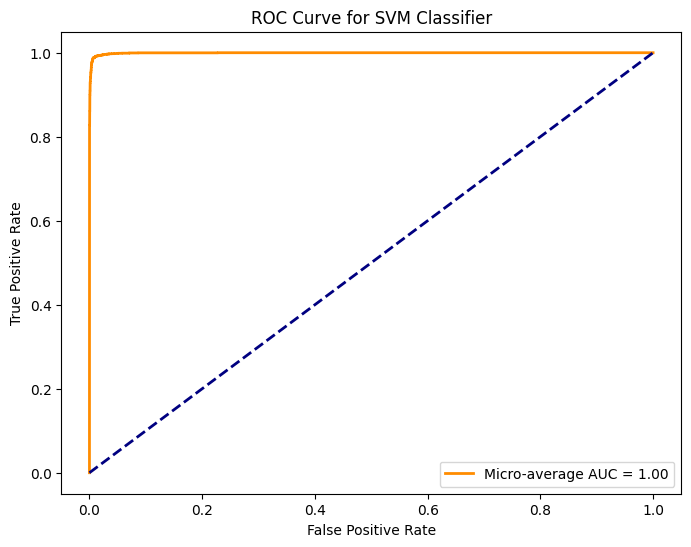

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output
y_val_bin = label_binarize(y_test_over, classes=np.unique(y_train_over))

# calculate the probabilities on the validation set
SVM_y_prob_tuned = svm_model_over.predict_proba(X_test_over)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], SVM_y_prob_tuned[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), SVM_y_prob_tuned.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2, label=f'Micro-average AUC = {roc_auc["micro"]:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

# initialize and train the Decision Tree model on the oversampled data
dt_model_over = DecisionTreeClassifier()
dt_model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [25]:
# make predictions on the test set
y_pred_over = dt_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))


Accuracy:  0.9404009887393573

Precision:  0.9423888436406226

Recall:  0.9404009887393573

F1 Score:  0.9393930425424342


## Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

# initialize and train the Random Forest model on the oversampled data
rf_model_over = RandomForestClassifier()
rf_model_over.fit(X_train_over, y_train_over)

RandomForestClassifier()

In [27]:
# make predictions on the test set
y_pred_over = rf_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))


Accuracy:  0.982147761603955

Precision:  0.9822852486447404

Recall:  0.982147761603955

F1 Score:  0.9821469886872997


In [34]:
# Initialize the sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

In [35]:
# Define a function to get the sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

In [36]:
# Apply the function to the 'review text' column
df['sentiment_scores'] = df['cleaned_text_str'].apply(get_sentiment_scores)

In [37]:
# Split the sentiment scores into separate columns
df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df.head(10)

,stars,cleaned_text,sentiment,cleaned_text_list,cleaned_text_str,neg,neu,pos,compound,neg,neu,pos,compound
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative,"[lately, common, wait, hour, food, passed, dri...",lately common wait hour food passed driver one...,0.231,0.660,0.108,-0.6369,0.231,0.660,0.108,-0.6369
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive,"[love, great, offer, good, selection, food, sh...",love great offer good selection food shopping ...,0.095,0.536,0.370,0.9468,0.095,0.536,0.370,0.9468
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative,"[disappointed, app, used, long, time, service,...",disappointed app used long time service fee ke...,0.159,0.841,0.000,-0.6705,0.159,0.841,0.000,-0.6705
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative,"[fairly, easy, use, trying, find, happening, c...",fairly easy use trying find happening contacti...,0.116,0.685,0.199,0.5574,0.116,0.685,0.199,0.5574
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive,"[like, fact, u, ca, get, refund, unless, u, ta...",like fact u ca get refund unless u take pictur...,0.093,0.791,0.116,0.3182,0.093,0.791,0.116,0.3182
5,4,"['usually', 'work', 'well', 'use', 'often', 'i...",positive,"[usually, work, well, use, often, issue, handl...",usually work well use often issue handled with...,0.050,0.717,0.233,0.8402,0.050,0.717,0.233,0.8402
6,2,"['ignoring', 'astronomical', 'tax', 'fee', 'fo...",negative,"[ignoring, astronomical, tax, fee, forced, upd...",ignoring astronomical tax fee forced update ap...,0.205,0.732,0.063,-0.7923,0.205,0.732,0.063,-0.7923
7,1,"['ive', 'absolutely', 'horrible', 'experience'...",negative,"[ive, absolutely, horrible, experience, app, d...",ive absolutely horrible experience app driver ...,0.182,0.702,0.116,-0.6478,0.182,0.702,0.116,-0.6478
8,1,"['give', 'zero', 'could', 'food', 'usually', '...",negative,"[give, zero, could, food, usually, fine, resta...",give zero could food usually fine restaurant s...,0.259,0.608,0.133,-0.7650,0.259,0.608,0.133,-0.7650
9,1,"['everything', 'run', 'smooth', 'part', 'cance...",negative,"[everything, run, smooth, part, cancelled, som...",everything run smooth part cancelled something...,0.130,0.662,0.209,0.6249,0.130,0.662,0.209,0.6249


## Trying to use keras and tensorflow here

In [28]:
# Tokenizing and adding padding
max_words = 5000
max_len = 200

In [30]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
y_train_over = le.fit_transform(y_train_over)
y_test_over = le.transform(y_test_over)

# Convert integer labels to binary form
y_train_over = to_categorical(y_train_over)
y_test_over = to_categorical(y_test_over)

In [33]:
# Define a custom F1 score metric
def f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+tf.keras.backend.epsilon())
    return f1_val

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train_over.shape[1], activation='relu'))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', f1_score])

# Fit the model to the oversampled data
training_history = model.fit(X_train_over, y_train_over, epochs=10, batch_size=32, validation_data=(X_test_over, y_test_over))

Epoch 1/10
455/455 [==============================] - 2s 2ms/step - loss: 0.5095 - accuracy: 0.8359 - f1_score: 0.6860 - val_loss: 0.1806 - val_accuracy: 0.9445 - val_f1_score: 0.9459
Epoch 2/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9743 - f1_score: 0.9745 - val_loss: 0.0990 - val_accuracy: 0.9695 - val_f1_score: 0.9692
Epoch 3/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9911 - f1_score: 0.9912 - val_loss: 0.0844 - val_accuracy: 0.9725 - val_f1_score: 0.9726
Epoch 4/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9975 - f1_score: 0.9975 - val_loss: 0.0801 - val_accuracy: 0.9731 - val_f1_score: 0.9734
Epoch 5/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0078 - accuracy: 0.9991 - f1_score: 0.9991 - val_loss: 0.0890 - val_accuracy: 0.9717 - val_f1_score: 0.9715
Epoch 6/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0040

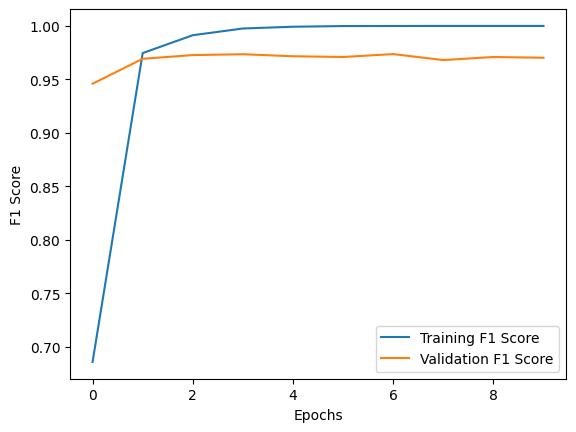

In [34]:
# Plot the training and validation F1 score
plt.plot(training_history.history['f1_score'], label='Training F1 Score')
plt.plot(training_history.history['val_f1_score'], label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Evaluation

In [44]:
df_test = pd.read_csv('cleaned_data.csv')
df_test

,stars,cleaned_text,sentiment
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive
...,...,...,...
8892,5,"['food', 'good', 'delivery', 'took', 'forever'...",positive
8893,1,"['whenever', 'never', 'sent', 'correct', 'item...",negative
8894,1,"['delivery', 'driver', 'turn', 'incorrect', 'l...",negative
8895,5,"['great', 'deal', 'buddy', 'pizza', 'buy', 'on...",positive


In [45]:
import ast
# convert string representations of lists in 'cleaned_text' back to actual lists
df_test['cleaned_text_list'] = df['cleaned_text'].apply(ast.literal_eval)

# convert lists in 'cleaned_text_list' to strings
df_test['cleaned_text_str'] = df['cleaned_text_list'].apply(' '.join)

In [46]:
# initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [49]:
# convert 'cleaned_text_str' into TF-IDF vectors
X_val = vectorizer.fit_transform(df_test['cleaned_text_str'])

# use 'sentiment' as target
y_val = df_test['sentiment']

In [55]:
# Use the SVM model to make predictions
df_test['predicted_sentiment'] = svm_model_over.predict(X_val)

In [56]:
df_test.head() 

,stars,cleaned_text,sentiment,cleaned_text_list,cleaned_text_str,predicted_sentiment
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative,"[lately, common, wait, hour, food, passed, dri...",lately common wait hour food passed driver one...,negative
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive,"[love, great, offer, good, selection, food, sh...",love great offer good selection food shopping ...,positive
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative,"[disappointed, app, used, long, time, service,...",disappointed app used long time service fee ke...,negative
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative,"[fairly, easy, use, trying, find, happening, c...",fairly easy use trying find happening contacti...,negative
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive,"[like, fact, u, ca, get, refund, unless, u, ta...",like fact u ca get refund unless u take pictur...,positive


In [57]:
# Evaluate the accuracy
accuracy = accuracy_score(y_val, df_test['predicted_sentiment'])
print('Accuracy:', accuracy)

Accuracy: 0.9928065640103405


In [63]:
f1 = f1_score(y_val, df_test['predicted_sentiment'], average='weighted')
print('F1 Score:', f1)

F1 Score: 0.9928101869836956


In [64]:
recall = recall_score(y_val, df_test['predicted_sentiment'], average='weighted')
print('Recall:', recall)

Recall: 0.9928065640103405


In [65]:
precision = precision_score(y_val, df_test['predicted_sentiment'], average='weighted')
print('Precision:', precision)

Precision: 0.9928167112419055


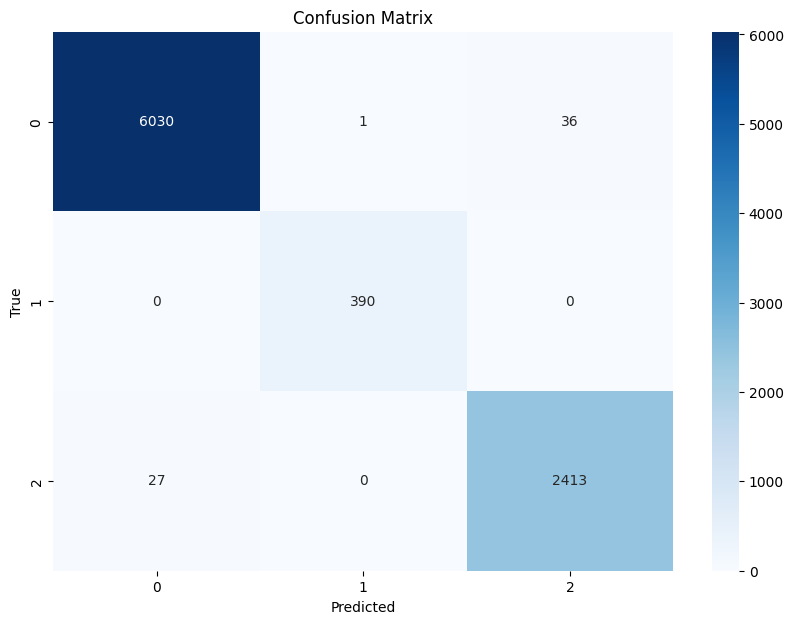

In [66]:
confusion = confusion_matrix(y_val, df_test['predicted_sentiment'])

plt.figure(figsize=(10,7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()